In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [4]:
training=train_datagen.flow_from_directory('/content/drive/MyDrive/Nhan dien/train',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 90 images belonging to 3 classes.


In [6]:
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Nhan dien/test',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 15 images belonging to 3 classes.


In [7]:
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                    

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(training,steps_per_epoch=len(training),epochs=100,validation_data=test,validation_steps=len(test))

Epoch 1/100
5/5 [==============================] - 30s 3s/step - loss: 2.1644 - accuracy: 0.4111 - val_loss: 1.1145 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 2s 529ms/step - loss: 1.1156 - accuracy: 0.4000 - val_loss: 1.0787 - val_accuracy: 0.4000
Epoch 3/100
5/5 [==============================] - 2s 458ms/step - loss: 0.9765 - accuracy: 0.5778 - val_loss: 1.0121 - val_accuracy: 0.5333
Epoch 4/100
5/5 [==============================] - 2s 463ms/step - loss: 2.4838 - accuracy: 0.4556 - val_loss: 0.8070 - val_accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 2s 456ms/step - loss: 0.6561 - accuracy: 0.6889 - val_loss: 0.5573 - val_accuracy: 0.6667
Epoch 6/100
5/5 [==============================] - 2s 480ms/step - loss: 0.7897 - accuracy: 0.6000 - val_loss: 0.3384 - val_accuracy: 0.9333
Epoch 7/100
5/5 [==============================] - 2s 451ms/step - loss: 0.0919 - accuracy: 0.9778 - val_loss: 1.5978 - val_accuracy: 0.6667
Epoch 8/100
5/5

In [9]:
model.save('nhandiencnn.h5')

In [10]:
model_nhandien=load_model('nhandiencnn.h5')

In [11]:
training.class_indices

{'DUOC': 0, 'GIANG': 1, 'TRIEN': 2}

TRIEN
2


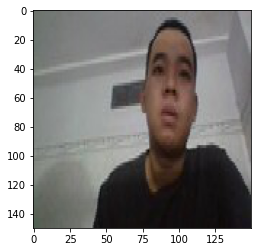

In [12]:
img=load_img('/content/drive/MyDrive/Nhan dien/test/TRIEN/31_TRIEN.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('DUOC')
if a[0]==1:
  print('GIANG')
if a[0]==2:
  print('TRIEN')
print(a[0])

DUOC


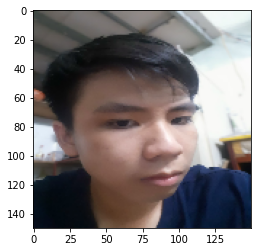

In [13]:
img=load_img('/content/drive/MyDrive/Nhan dien/test/DUOC/31_DUOC.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('DUOC')
if a[0]==1:
  print('GIANG')
if a[0]==2:
  print('TRIEN')

GIANG


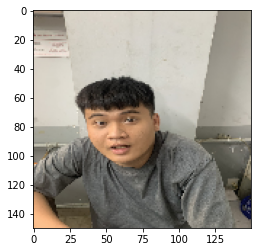

In [14]:
img=load_img('/content/drive/MyDrive/Nhan dien/test/GIANG/31_GIANG.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('DUOC')
if a[0]==1:
  print('GIANG')
if a[0]==2:
  print('TRIEN')

In [15]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('nhandiencnn.ipynb')